#Análisis Exploratorio de Datos - CAB Survey



La siguiente notebook contiene un análisis exploratorio de datos respecto de la base de datos de la Encuesta Clínica, Antropométrica y Bioquímica (Clinical, Anthropometric & Biochemical Survey (CAB Survey)) realizado por el gobierno de India. El objetivo de esta encuesta es suplementar la información que se obtiene en su Encuesta Anual de Salud (Annual Health Survey (AHS)) respecto de estado nutricional, enfermedades relacionadas con el estilo de vida, como ser diabetes, hipertensión y anemia, entre otros.



Para más información sobre este censo, se puede revisar el siguiente documento: https://www.censusindia.gov.in/2011census/hh-series/HH-2/CAB-Introduction.pdf


Los datos a trabajar en la siguiente notebook, se obtuvieron del repositorio oficial de datos: https://nrhm-mis.nic.in/hmisreports/AHSReports.aspx

En particular, se trabajará con la información del estado número 5.


El objetivo de un análisis exploratorio de datos es poder conocer la calidad de los datos con los cuales se desea trabajar, así como identificar diferentes huecos o falencias que posea la data.


Una notebook interesante con ciertas ideas para análisis exploratorios de datos se encuentra en: https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas

Por último, para este análisis se va utilizar una libreria de Python denominada Pandas. En el siguiente link, se puede encontrar la documentación de la misma: https://pandas.pydata.org/docs/getting_started/index.html



## Pasos a seguir

### Montar el google drive

Este paso es necesario para poder trabajar con archivos del Drive, así como para guardar los resultados obtenidos. Recordar que los entornos de ejecución de Google Colab solo duran un determinado tiempo.


In [ ]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


Dependiendo del directorio donde se monte el disco de Drive, es que quizás se deba cambiar el directorio sobre el cual va a estar situada la notebook


In [ ]:
%cd ..

%ldir

/
drwxr-xr-x   1 root 4096 Mar  5 14:29 bin/
drwxr-xr-x   2 root 4096 Apr 24  2018 boot/
drwxr-xr-x   1 root 4096 Mar  5 14:37 content/
drwxr-xr-x   1 root 4096 Mar 12 14:45 datalab/
drwxr-xr-x   5 root  360 Mar 15 20:22 dev/
drwx------   5 root 4096 Mar 15 21:24 drive/
drwxr-xr-x   1 root 4096 Mar 15 20:22 etc/
drwxr-xr-x   2 root 4096 Apr 24  2018 home/
drwxr-xr-x   1 root 4096 Mar  5 14:30 lib/
drwxr-xr-x   2 root 4096 Mar  5 14:20 lib32/
drwxr-xr-x   1 root 4096 Mar  5 14:19 lib64/
drwxr-xr-x   2 root 4096 Sep 21 17:14 media/
drwxr-xr-x   2 root 4096 Sep 21 17:14 mnt/
drwxr-xr-x   1 root 4096 Mar  5 14:31 opt/
dr-xr-xr-x 124 root    0 Mar 15 20:22 proc/
drwx------   1 root 4096 Mar 15 20:22 root/
drwxr-xr-x   1 root 4096 Mar  5 14:22 run/
drwxr-xr-x   1 root 4096 Mar  5 14:29 sbin/
drwxr-xr-x   2 root 4096 Sep 21 17:14 srv/
dr-xr-xr-x  12 root    0 Mar 15 20:22 sys/
drwxr-xr-x   4 root 4096 Mar 12 14:41 tensorflow-1.15.2/
drwxrwxrwt   1 root 4096 Mar 15 21:24 tmp/
drwxr-xr-x   1 ro

###Importar archivo csv

El segundo paso, consta de leer el archivo con los datos. En este caso, se trata de un archivo .csv. Para leerlo, se va a utilizar la libreria Pandas que va a importar el archivo a lo que se denomina un dataframe. 

Para hacer esto, se necesita previamente importar la libreria. En este punto, se van a importar otras dos librerias de utilidad: numpy y seaborn


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('drive/MyDrive/Redes neuronales/05.csv', delimiter='|')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Examinar los datos

El primer paso para conocer el formato de los datos puede ser mirar las primeras cinco filas del dataframe. También es importante recordar que junto con los datos, se comparte un diccionario de datos que contiene las definiciones de cada uno de los campos, así como los valores por default

Luego, se van a ver los encabezados de las columnas y también la información de cada campo.

Por último, se utiliza una función de Pandas que se denomina describe que permite ver ciertas estadísticas de todos los campos numéricos.

In [ ]:
df.head()

,state_code,district_code,rural_urban,stratum,psu_id,ahs_house_unit,house_hold_no,date_survey,test_salt_iodine,record_code_iodine,record_code_iodine_reason,sl_no,sex,usual_residance,usual_residance_reason,identification_code,age_code,age,date_of_birth,month_of_birth,year_of_birth,weight_measured,weight_in_kg,length_height_measured,length_height_code,length_height_cm,haemoglobin_test,haemoglobin,haemoglobin_level,bp_systolic,bp_systolic_2_reading,bp_diastolic,bp_diastolic_2reading,pulse_rate,pulse_rate_2_reading,diabetes_test,fasting_blood_glucose,fasting_blood_glucose_mg_dl,marital_status,gauna_perfor_not_perfor,duration_pregnanacy,first_breast_feeding,is_cur_breast_feeding,day_or_month_for_breast_feeding_,day_or_month_for_breast_feeding,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type,v54
0,5,1,2,0,2824575,94,2,20/05/2014,30,3,NaN,3,2,1,NaN,4460.0,M,4,12,1,2014,4,-1.0,4,-1,-1.000000,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,NaN
1,5,1,2,0,2824574,24,4,19/05/2014,30,3,NaN,8,1,1,NaN,4451.0,Y,1,25,5,2013,1,10.0,1,H,79.199997,1,1,11.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,M,6,6,6,6,7,7,0,-1,-1,NaN
2,5,1,2,0,2824572,11,2,18/05/2014,30,3,NaN,5,2,1,NaN,4453.0,Y,2,28,6,2012,1,19.6,1,H,80.199997,2,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,M,18,6,11,6,7,7,0,-1,-1,NaN
3,5,1,2,0,2824573,104,1,19/05/2014,30,3,NaN,5,1,1,NaN,4459.0,Y,2,20,5,2012,1,12.4,1,H,80.000000,2,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,NaN
4,5,1,2,0,2823687,63,2,17/05/2014,30,3,NaN,3,2,1,NaN,694.0,Y,2,6,6,2012,1,12.3,1,H,81.199997,1,1,11.2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,M,14,6,10,6,7,7,-1,-1,-1,NaN


In [ ]:
df.columns

Index(['state_code', 'district_code', 'rural_urban', 'stratum', 'psu_id',
       'ahs_house_unit', 'house_hold_no', 'date_survey', 'test_salt_iodine',
       'record_code_iodine', 'record_code_iodine_reason', 'sl_no', 'sex',
       'usual_residance', 'usual_residance_reason', 'identification_code',
       'age_code', 'age', 'date_of_birth', 'month_of_birth', 'year_of_birth',
       'weight_measured', 'weight_in_kg', 'length_height_measured',
       'length_height_code', 'length_height_cm', 'haemoglobin_test',
       'haemoglobin', 'haemoglobin_level', 'bp_systolic',
       'bp_systolic_2_reading', 'bp_diastolic', 'bp_diastolic_2reading',
       'pulse_rate', 'pulse_rate_2_reading', 'diabetes_test',
       'fasting_blood_glucose', 'fasting_blood_glucose_mg_dl',
       'marital_status', 'gauna_perfor_not_perfor', 'duration_pregnanacy',
       'first_breast_feeding', 'is_cur_breast_feeding',
       'day_or_month_for_breast_feeding_', 'day_or_month_for_breast_feeding',
       'water_month'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67342 entries, 0 to 67341
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   state_code                        67342 non-null  int64  
 1   district_code                     67342 non-null  int64  
 2   rural_urban                       67342 non-null  int64  
 3   stratum                           67342 non-null  int64  
 4   psu_id                            67342 non-null  int64  
 5   ahs_house_unit                    67342 non-null  int64  
 6   house_hold_no                     67342 non-null  int64  
 7   date_survey                       67342 non-null  object 
 8   test_salt_iodine                  67342 non-null  int64  
 9   record_code_iodine                67342 non-null  int64  
 10  record_code_iodine_reason         0 non-null      float64
 11  sl_no                             67342 non-null  int64  
 12  sex 

In [ ]:
df.describe()

,state_code,district_code,rural_urban,stratum,psu_id,ahs_house_unit,house_hold_no,test_salt_iodine,record_code_iodine,record_code_iodine_reason,sl_no,sex,usual_residance,identification_code,age,date_of_birth,month_of_birth,year_of_birth,weight_measured,weight_in_kg,length_height_measured,length_height_cm,haemoglobin_test,haemoglobin,haemoglobin_level,bp_systolic,bp_systolic_2_reading,bp_diastolic,bp_diastolic_2reading,pulse_rate,pulse_rate_2_reading,diabetes_test,fasting_blood_glucose,fasting_blood_glucose_mg_dl,marital_status,gauna_perfor_not_perfor,duration_pregnanacy,first_breast_feeding,is_cur_breast_feeding,day_or_month_for_breast_feeding,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type,v54
count,67342.0,67342.000000,67342.000000,67342.000000,6.734200e+04,67342.000000,67342.000000,67342.000000,67342.000000,0.0,67342.00000,67342.000000,67342.000000,67338.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.00000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,67342.000000,0.0
mean,5.0,7.801981,1.209661,1.137448,2.856437e+06,191.060943,1.443928,26.497476,2.908764,NaN,3.29316,1.514760,1.110956,1045.830274,30.830893,14.109857,6.218081,1982.883401,0.859137,37.311077,0.863651,119.280702,0.915476,0.768035,5.602899,68.685976,67.082757,43.880550,43.079876,44.407576,43.831546,0.234801,0.19793,52.084628,-0.161222,-0.402201,-0.847450,-0.929182,-0.930563,-0.798551,-0.847777,-0.841837,-0.793591,-0.769861,-0.763535,-0.912536,-0.946972,-0.960248,NaN
std,0.0,3.726837,0.407070,0.733407,2.025234e+04,171.323498,1.284657,7.732801,0.383180,NaN,6.42390,0.499786,0.314080,1169.952655,20.457701,7.245421,3.043975,20.491053,0.735106,24.423990,0.741785,60.979882,0.850096,1.031854,5.251160,65.498767,63.861703,42.204995,41.333541,42.481902,41.838976,1.058072,1.07244,52.808547,1.577858,1.399836,1.570147,0.432272,0.416028,1.402484,0.976769,1.057799,1.318221,1.498257,1.561691,0.461925,0.490228,0.339037,NaN
min,5.0,1.000000,1.000000,0.000000,2.821976e+06,1.000000,0.000000,0.000000,1.000000,NaN,0.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1913.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN
25%,5.0,5.000000,1.000000,1.000000,2.838811e+06,65.000000,1.000000,30.000000,3.000000,NaN,2.00000,1.000000,1.000000,318.000000,14.000000,10.000000,4.000000,1969.000000,1.000000,15.300000,1.000000,101.800000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN
50%,5.0,8.000000,1.000000,1.000000,2.855646e+06,150.000000,1.000000,30.000000,3.000000,NaN,3.00000,2.000000,1.000000,729.000000,26.000000,15.000000,6.000000,1987.000000,1.000000,43.700001,1.000000,150.000000,1.000000,1.000000,7.500000,101.000000,100.000000,64.000000,64.000000,67.000000,67.000000,1.000000,1.00000,79.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN
75%,5.0,11.000000,1.000000,2.000000,2.874404e+06,271.000000,2.000000,30.000000,3.000000,NaN,4.00000,2.000000,1.000000,1375.000000,45.000000,17.000000,8.000000,1999.000000,1.000000,56.200001,1.000000,159.500000,1.000000,1.000000,10.000000,127.000000,124.000000,82.000000,80.00000

A partir de este análisis se puede concluir dos cosas:

*   Existen muchas columnas que no necesariamente son útiles para todos los análisis
*   El valor por default del dataset para indicar la ausencia de un dato numérico es -1


###Limpieza dataset

Se seleccionan ciertas columnas para continuar con el análisis exploratorio. Además, se procede a reemplzar los -1 con NaN para que al analizarlo sean tomados como valores nulos.

En este caso particular, se busca predecir qué casos de adultos mayores de 18 años van a resultar con un nivel de glucos en sangre elevada en ayuno. Según el CDC (Center for Disease Control and Prevention (USA)), un nivel mayor o igual a 100 mg/dl es un valor elevado de glucosa en sangre. Este valor podría ser indicativo de que una persona padezca pre diabetes o diabetes. (https://www.cdc.gov/diabetes/basics/getting-tested.html)


Por eso, va a ser necesario eliminar aquellas personas menores de 18 años, así como quienes no posean el dato de valor de glucosa en sangre en ayuno.

Por último, se agregará una columna que indique si el individuo posee glucosa en sangre alta dado el resultado de su análisis.

In [ ]:
df_filtrado = df[['state_code', 'district_code', 'rural_urban', 'date_survey', 'sex', 'age_code', 'age', 'weight_measured', 'weight_in_kg', 'length_height_measured', 'length_height_code', 'length_height_cm', \
                  'bp_systolic', 'bp_diastolic', 'pulse_rate', 'diabetes_test', 'fasting_blood_glucose', 'fasting_blood_glucose_mg_dl']]

df_filtrado = df_filtrado.replace(-1, np.nan)

df_filtrado_diabetes = df_filtrado[(df_filtrado['age_code'] == 'Y') 
                        & (df_filtrado['age'] >= 18) 
                        & (df_filtrado['diabetes_test'] == 1) 
                        & (df_filtrado['fasting_blood_glucose'] == 1) 
                        & (df_filtrado['fasting_blood_glucose_mg_dl'].notnull())]

df_filtrado_diabetes['has_high_blood_glucose'] = df_filtrado_diabetes['fasting_blood_glucose_mg_dl'] >= 100.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
df_filtrado_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35533 entries, 111 to 67337
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state_code                   35533 non-null  int64  
 1   district_code                35533 non-null  int64  
 2   rural_urban                  35533 non-null  int64  
 3   date_survey                  35533 non-null  object 
 4   sex                          35533 non-null  int64  
 5   age_code                     35533 non-null  object 
 6   age                          35533 non-null  int64  
 7   weight_measured              35508 non-null  float64
 8   weight_in_kg                 35475 non-null  float64
 9   length_height_measured       35533 non-null  float64
 10  length_height_code           35533 non-null  object 
 11  length_height_cm             35446 non-null  float64
 12  bp_systolic                  35503 non-null  float64
 13  bp_diastolic  

### Análisis estadístico población

Por un lado, es importante concoer dentro de la población, cuantos casos tienen glucosa elevada en sangre y que porcentaje de la población representan dichos casos.

Por otro lado, resulta importante analizar la calidad de las otras variables del dataset, para poder también evaluar la calidad de los datos, así como solucionar problemas existentes. Por ejemplo, tomar alguna acción respecto de los valores nulos o aquellos que se escapan de un determinado rango.

Por último, se visualiza algunas de las distribuciones de ciertas variables (como ser el peso y la altura) y la distribución de las mismas dado la clasificación en si tiene o no alto el nivel de glucosa en sangre.

Dato adicional: se pueden agregar ciertas variables calculadas en base a otras, como puede ser el IMC o BMI (Indice de Masa Corporal)

In [ ]:
df_filtrado_diabetes['has_high_blood_glucose'].value_counts()

False    21971
True     13562
Name: has_high_blood_glucose, dtype: int64

In [ ]:
df_filtrado_diabetes['has_high_blood_glucose'].value_counts(normalize=True)

False    0.618327
True     0.381673
Name: has_high_blood_glucose, dtype: float64

In [ ]:
df_filtrado_diabetes.describe()

,state_code,district_code,rural_urban,sex,age,weight_measured,weight_in_kg,length_height_measured,length_height_cm,bp_systolic,bp_diastolic,pulse_rate,diabetes_test,fasting_blood_glucose,fasting_blood_glucose_mg_dl
count,35533.0,35533.000000,35533.000000,35533.000000,35533.000000,35508.000000,35475.000000,35533.000000,35446.000000,35503.000000,35503.000000,35503.000000,35533.0,35533.0,35533.000000
mean,5.0,8.079363,1.212366,1.579912,41.568429,1.004281,55.294854,1.006698,157.874643,126.845929,81.334310,82.284286,1.0,1.0,99.409056
std,0.0,3.492116,0.408988,0.493580,17.002234,0.110475,11.303553,0.139191,8.667734,20.839927,13.577934,12.421364,0.0,0.0,22.904688
min,5.0,1.000000,1.000000,1.000000,18.000000,1.000000,3.700000,1.000000,46.500000,61.000000,40.000000,40.000000,1.0,1.0,50.000000
25%,5.0,6.000000,1.000000,1.000000,27.000000,1.000000,47.099998,1.000000,152.000000,113.000000,72.000000,74.000000,1.0,1.0,90.000000
50%,5.0,8.000000,1.000000,2.000000,39.000000,1.000000,54.599998,1.000000,157.399990,125.000000,80.000000,80.000000,1.0,1.0,97.000000
75%,5.0,11.000000,1.000000,2.000000,54.000000,1.000000,62.299999,1.000000,164.000000,138.000000,90.000000,90.000000,1.0,1.0,103.000000
max,5.0,13.000000,2.000000,2.000000,100.000000,4.000000,157.600010,4.000000,192.800000,254.000000,160.000000,140.000000,1.0,1.0,400.000000


In [ ]:
#Contar la cantidad de valores nulos para cada variable

print(df_filtrado_diabetes.isnull().sum())

state_code                      0
district_code                   0
rural_urban                     0
date_survey                     0
sex                             0
age_code                        0
age                             0
weight_measured                25
weight_in_kg                   58
length_height_measured          0
length_height_code              0
length_height_cm               87
bp_systolic                    30
bp_diastolic                   30
pulse_rate                     30
diabetes_test                   0
fasting_blood_glucose           0
fasting_blood_glucose_mg_dl     0
has_high_blood_glucose          0
dtype: int64


También se pueden agregar ciertas variables que quizás no vienen en el dataset original como, por ejemplo, el Índice de Masa Corporal (IMC)

In [ ]:
df_filtrado_diabetes['IMC'] = df_filtrado_diabetes['weight_in_kg']/((df_filtrado_diabetes['length_height_cm']/100)**2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


####Análisis variables

Visualización de las diferentes variables para entender su distribución. Se excluyen variables que son solo indicativas de si se realizó la medición o no

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde89004390>,
      dtype=object)

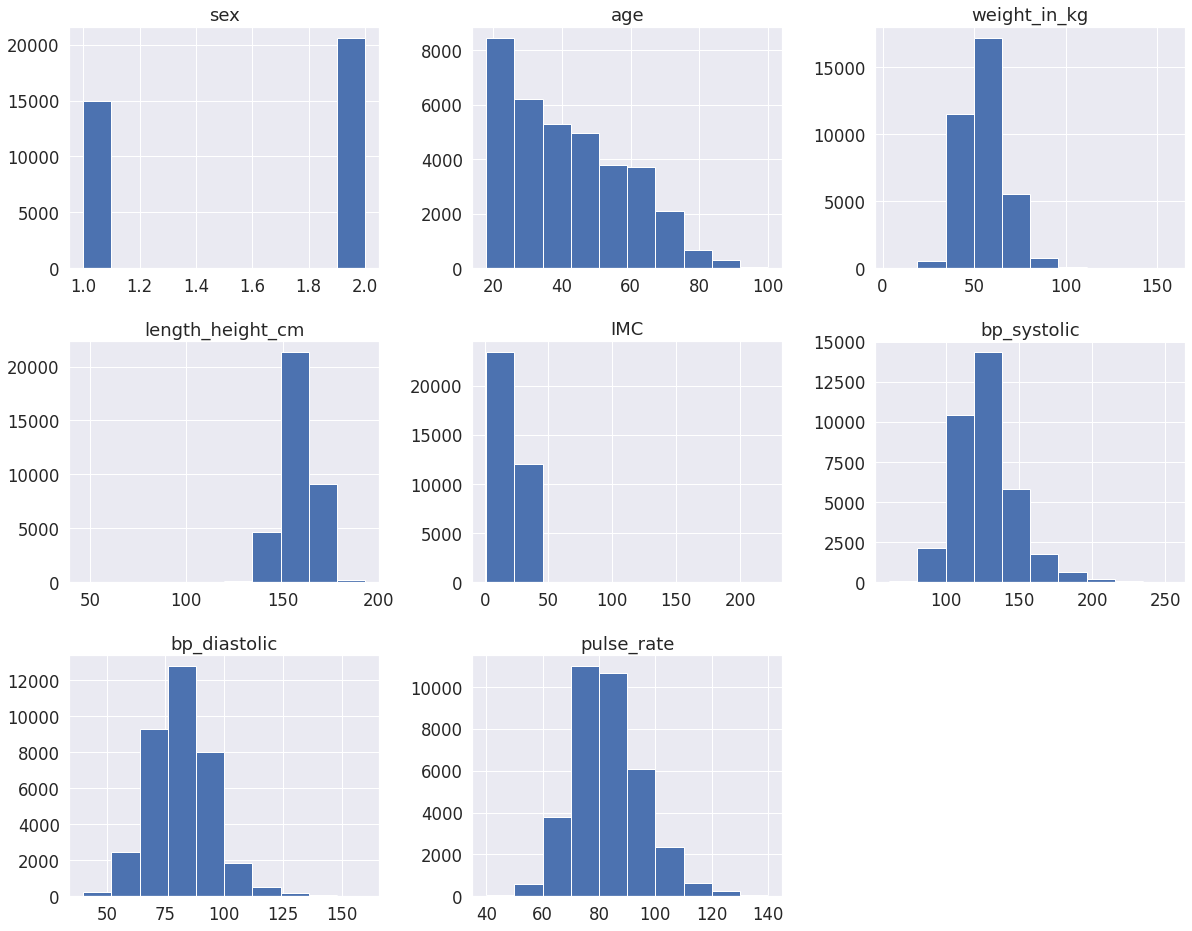

In [ ]:
df_plot_hist = df_filtrado_diabetes[['sex', 'age', 'weight_in_kg', 'length_height_cm', 'IMC', 'bp_systolic', 'bp_diastolic', 'pulse_rate']]

df_plot_hist.hist(figsize = (20,16), grid=True)

De los histogramas anteriores se puede ver que hay ciertas variables que tienen valores incorrectos. Estos se pueden detectar a partir del conocimiento de los valores fisiológicos de las mismas. Es importante tener ese criterio al evaluar un conjunto de datos particular.

Aquellos datos incorrectos, se podría considerar como si nunca se hubiera obtenido esa información y por eso se procede a reemplazarlo por NaN

In [ ]:
df_filtrado_diabetes.loc[df_filtrado_diabetes['weight_in_kg'] > 500, 'weight_in_kg' ] = np.NaN
df_filtrado_diabetes.loc[df_filtrado_diabetes['weight_in_kg'] < 20, 'weight_in_kg' ] = np.NaN
df_filtrado_diabetes.loc[df_filtrado_diabetes['length_height_cm'] > 220, 'length_height_cm' ] = np.NaN


df_filtrado_diabetes.loc[df_filtrado_diabetes['weight_measured'] > 1, 'weight_in_kg' ] = np.NaN
df_filtrado_diabetes.loc[df_filtrado_diabetes['length_height_measured'] > 1, 'length_height_cm' ] = np.NaN


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [ ]:
df_filtrado_diabetes['IMC'] = df_filtrado_diabetes['weight_in_kg']/((df_filtrado_diabetes['length_height_cm']/100)**2)

df_filtrado_diabetes.loc[df_filtrado_diabetes['weight_measured'] > 1, 'IMC' ] = np.NaN
df_filtrado_diabetes.loc[df_filtrado_diabetes['length_height_measured'] > 1, 'IMC' ] = np.NaN

df_filtrado_diabetes.loc[df_filtrado_diabetes['IMC'] > 50, 'IMC' ] = np.NaN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde85848450>,
      dtype=object)

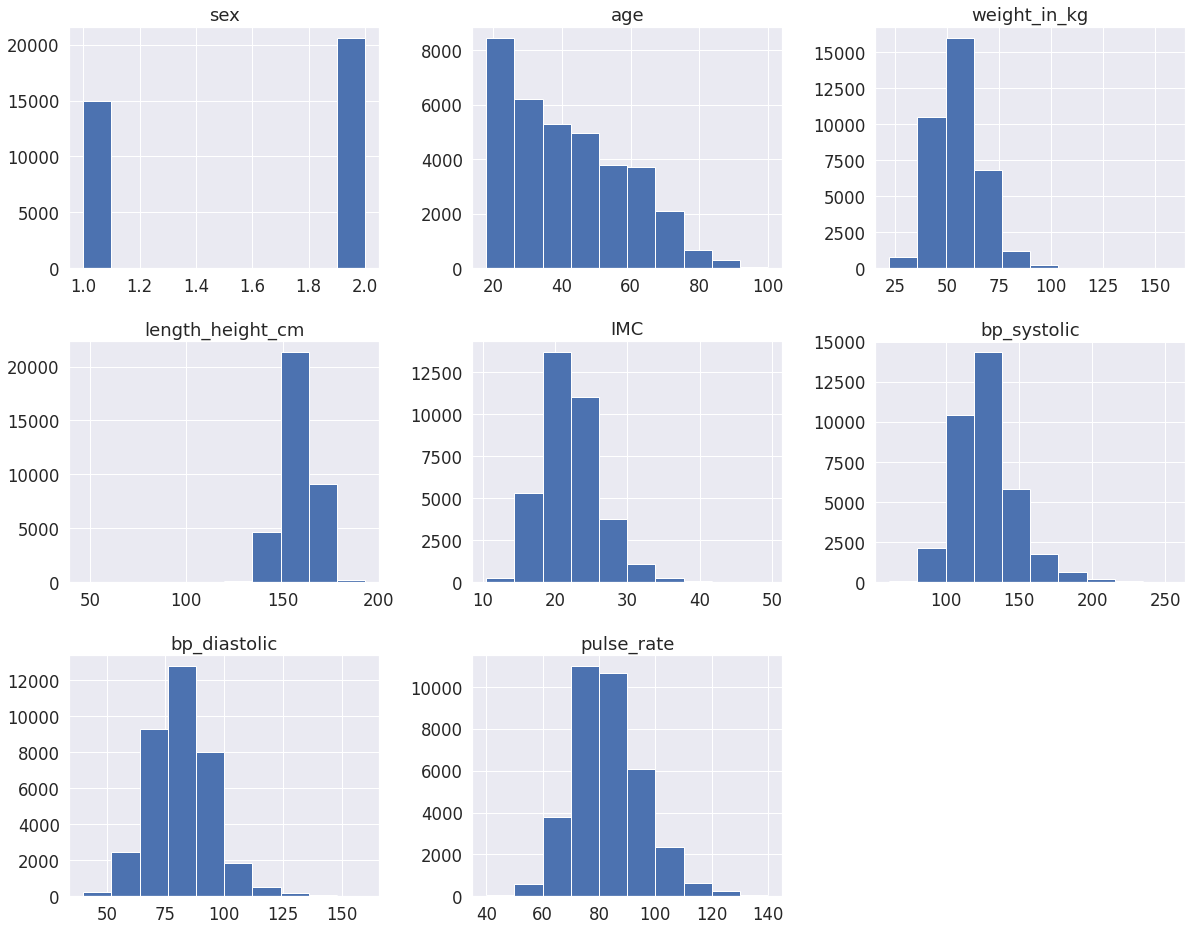

In [ ]:
df_plot_hist = df_filtrado_diabetes[['sex', 'age', 'weight_in_kg', 'length_height_cm', 'IMC', 'bp_systolic', 'bp_diastolic', 'pulse_rate']]

df_plot_hist.hist(figsize = (20,16), grid=True)

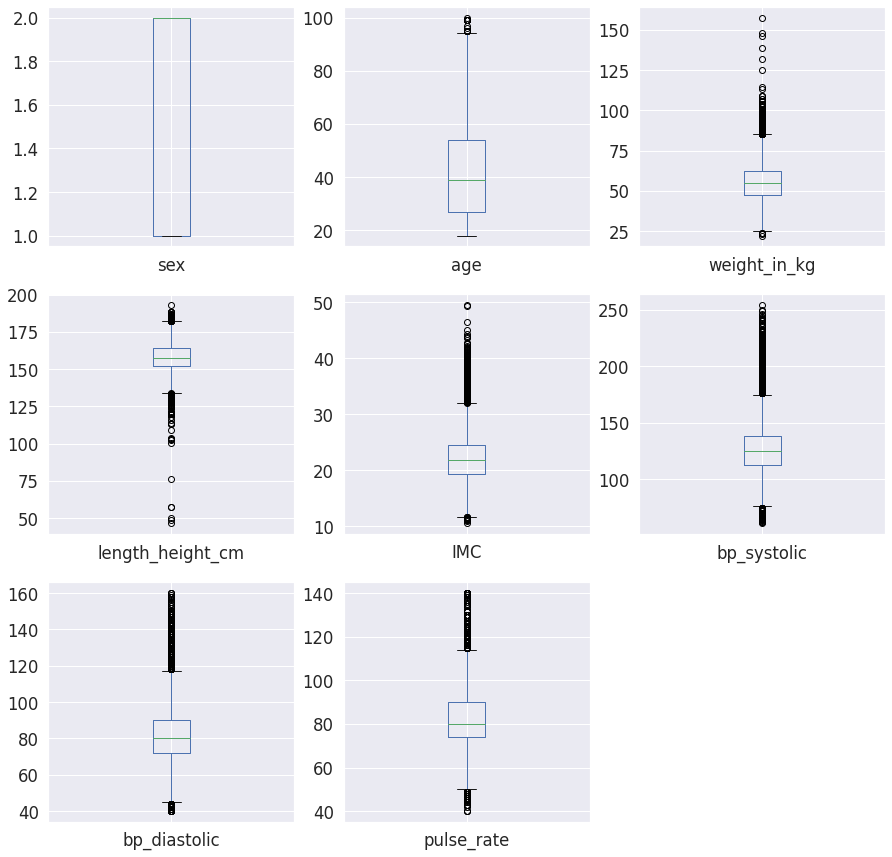

In [ ]:
df_plot_hist.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
sns.set(font_scale = 1.5)


In [ ]:
#Contar la cantidad de valores nulos para cada variable

print(df_filtrado_diabetes.isnull().sum())

state_code                       0
district_code                    0
rural_urban                      0
date_survey                      0
sex                              0
age_code                         0
age                              0
weight_measured                 25
weight_in_kg                    63
length_height_measured           0
length_height_code               0
length_height_cm                87
bp_systolic                     30
bp_diastolic                    30
pulse_rate                      30
diabetes_test                    0
fasting_blood_glucose            0
fasting_blood_glucose_mg_dl      0
has_high_blood_glucose           0
IMC                            107
dtype: int64


####Tratamiento valores nulos

Existen dos posibilidades para el tratamiento de los valores nulos:


*   Eliminar aquellos registros que tienen valores nulos en las variables que se piensan utilizar para el modelo
*   Reemplazar los valores nulos por algún valor predifinido (constante, media, mediana, entre otros). En este segundo caso, es importante tener separado el conjunto de datos en entrenamiento y prueba, antes de calcular el valor que se utilizará para reemplazar. También es importante guardar los valores que se usen en el set de entrenamientos para usarlos con el set de prueba.


Se mostraran ambas posibilidades. Sin embargo, se puede observar que en este caso, el número de registros que tienen algún valor nulo es mínimo respecto del total de registros.



##### Eliminación de valores nulos

In [ ]:
df_filtrado_diabetes_final = df_filtrado_diabetes[(df_filtrado_diabetes['weight_measured']==1) & (df_filtrado_diabetes['weight_in_kg'].notnull()) 
                                                  & (df_filtrado_diabetes['length_height_measured']==1) & (df_filtrado_diabetes['length_height_cm'].notnull()) 
                                                  & (df_filtrado_diabetes['bp_systolic'].notnull()) & (df_filtrado_diabetes['bp_diastolic'].notnull()) 
                                                  & (df_filtrado_diabetes['pulse_rate'].notnull()) & (df_filtrado_diabetes['IMC'].notnull())]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_filtrado_diabetes_final[['age', 'weight_in_kg', 'length_height_cm', 'IMC', 'bp_systolic', 'bp_diastolic', 'pulse_rate']], \
                                                    df_filtrado_diabetes_final[['has_high_blood_glucose']], test_size = 0.2, random_state = 3)

##### Reemplazo de valores nulos

In [ ]:
X_train_seg, X_test_seg, y_train_seg, y_test_seg = train_test_split(df_filtrado_diabetes[['sex', 'age', 'weight_in_kg', 'length_height_cm', 'IMC', 'bp_systolic', 'bp_diastolic', 'pulse_rate']], \
                                                    df_filtrado_diabetes[['has_high_blood_glucose']], test_size = 0.2, random_state = 3)



In [ ]:
X_train_seg.shape

(234077, 8)

In [ ]:
#Obtener la media de cada columna
col_mean = np.nanmean(X_train_seg, axis=0)

print(col_mean)

#Encontrar los indices de los valores que se necesitan reemplazar
inds = np.where(np.isnan(X_train_seg))

print(inds)

#Reemplazar los valores nulos
X_train_seg.to_numpy()[inds] = np.take(col_mean, inds[1])

print(X_train_seg)

print(X_train_seg.isnull().sum())

[  1.53519141  40.03657344  50.81321013 155.49534909  20.95483124
 124.331415    78.93868822  81.54908189]
(array([], dtype=int64), array([], dtype=int64))
        sex   age  weight_in_kg  ...  bp_systolic  bp_diastolic  pulse_rate
539266  2.0  30.0     40.500000  ...        127.0          80.0        75.0
322547  1.0  45.0     34.200001  ...         98.0          66.0        78.0
55320   1.0  79.0     81.000000  ...        209.0         122.0        71.0
351120  2.0  56.0     49.700001  ...        119.0          88.0        77.0
181555  2.0  64.0     52.000000  ...        124.0          85.0        80.0
...     ...   ...           ...  ...          ...           ...         ...
24556   1.0  50.0     68.900002  ...        127.0          71.0        86.0
92471   1.0  52.0     47.500000  ...        102.0          71.0        88.0
148267  2.0  60.0     40.400002  ...        128.0          90.0        73.0
398656  1.0  40.0     58.599998  ...        113.0          86.0        68.0
137629  

In [ ]:
#Se repite el proceso con el set de testing, usando los promedios del set de training

#Encontrar los indices de los valores que se necesitan reemplazar
inds = np.where(np.isnan(X_test_seg))

#Reemplazar los valores nulos
X_test_seg.to_numpy()[inds] = np.take(col_mean, inds[1])

print(X_test_seg)

print(X_test_seg.isnull().sum())

        sex   age  weight_in_kg  ...  bp_systolic  bp_diastolic  pulse_rate
70191   1.0  65.0     47.299999  ...        135.0          66.0        62.0
367584  1.0  55.0     34.799999  ...        165.0          85.0        80.0
48839   2.0  27.0     54.200001  ...        140.0          90.0        72.0
400800  2.0  29.0     56.299999  ...        129.0          94.0        88.0
392747  1.0  29.0     51.200001  ...        131.0          80.0        49.0
...     ...   ...           ...  ...          ...           ...         ...
358275  2.0  54.0     61.299999  ...        120.0          86.0        84.0
486264  1.0  33.0     73.900002  ...        127.0          92.0        88.0
518725  1.0  30.0     50.500000  ...        128.0          67.0        80.0
363263  1.0  18.0     39.400002  ...        118.0          75.0        70.0
52622   1.0  20.0     50.799999  ...        120.0          86.0        91.0

[58520 rows x 8 columns]
sex                 0
age                 0
weight_in_kg      

#### Análisis bivariado

Se utilizará el set de datos que se eliminaron aquellos registros nulos para hacer análisis de correlación y relación entre las variables

In [ ]:
corr = X_train.corr()
corr

,sex,age,weight_in_kg,length_height_cm,IMC,bp_systolic,bp_diastolic,pulse_rate
sex,1.000000,-0.036780,-0.321177,-0.645398,0.025619,-0.154530,-0.141711,0.126856
age,-0.036780,1.000000,0.066226,-0.044482,0.099147,0.400147,0.252283,-0.004039
weight_in_kg,-0.321177,0.066226,1.000000,0.487398,0.839073,0.330550,0.376268,0.005996
length_height_cm,-0.645398,-0.044482,0.487398,1.000000,-0.054607,0.117722,0.125015,-0.081365
IMC,0.025619,0.099147,0.839073,-0.054607,1.000000,0.304401,0.353217,0.054376
bp_systolic,-0.154530,0.400147,0.330550,0.117722,0.304401,1.000000,0.733452,0.068358
bp_diastolic,-0.141711,0.252283,0.376268,0.125015,0.353217,0.733452,1.000000,0.188271
pulse_rate,0.126856,-0.004039,0.005996,-0.081365,0.054376,0.068358,0.188271,1.000000


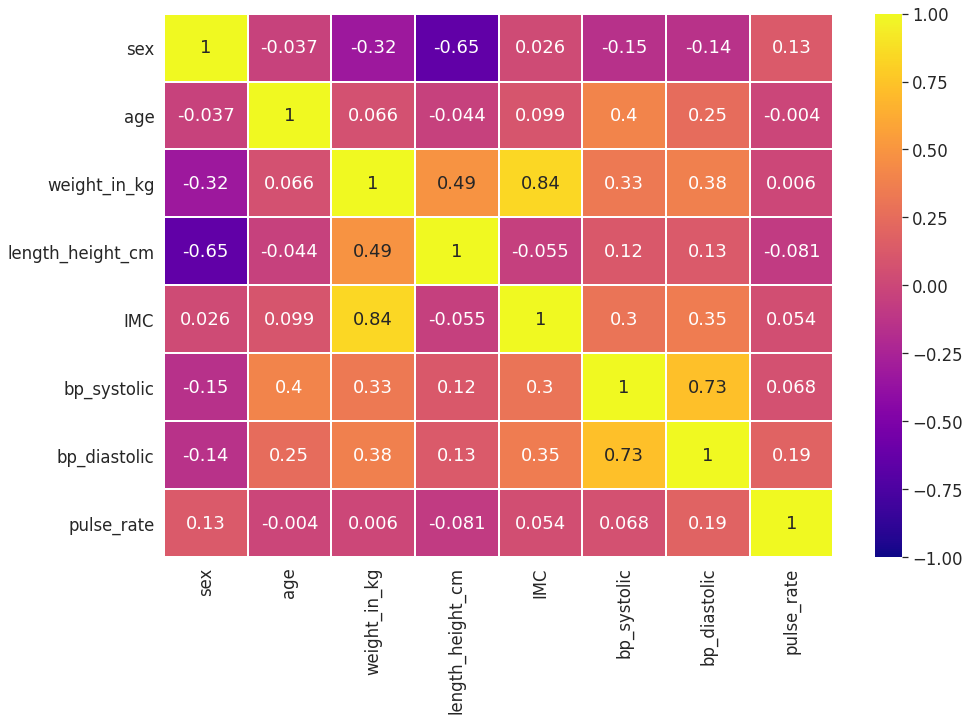

In [ ]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.heatmap(corr, annot = True, cmap = 'plasma', vmin = -1, vmax = 1, linecolor='white', linewidths= 1)

In [ ]:
train_set = X_train.merge(y_train, left_index=True, right_index=True)

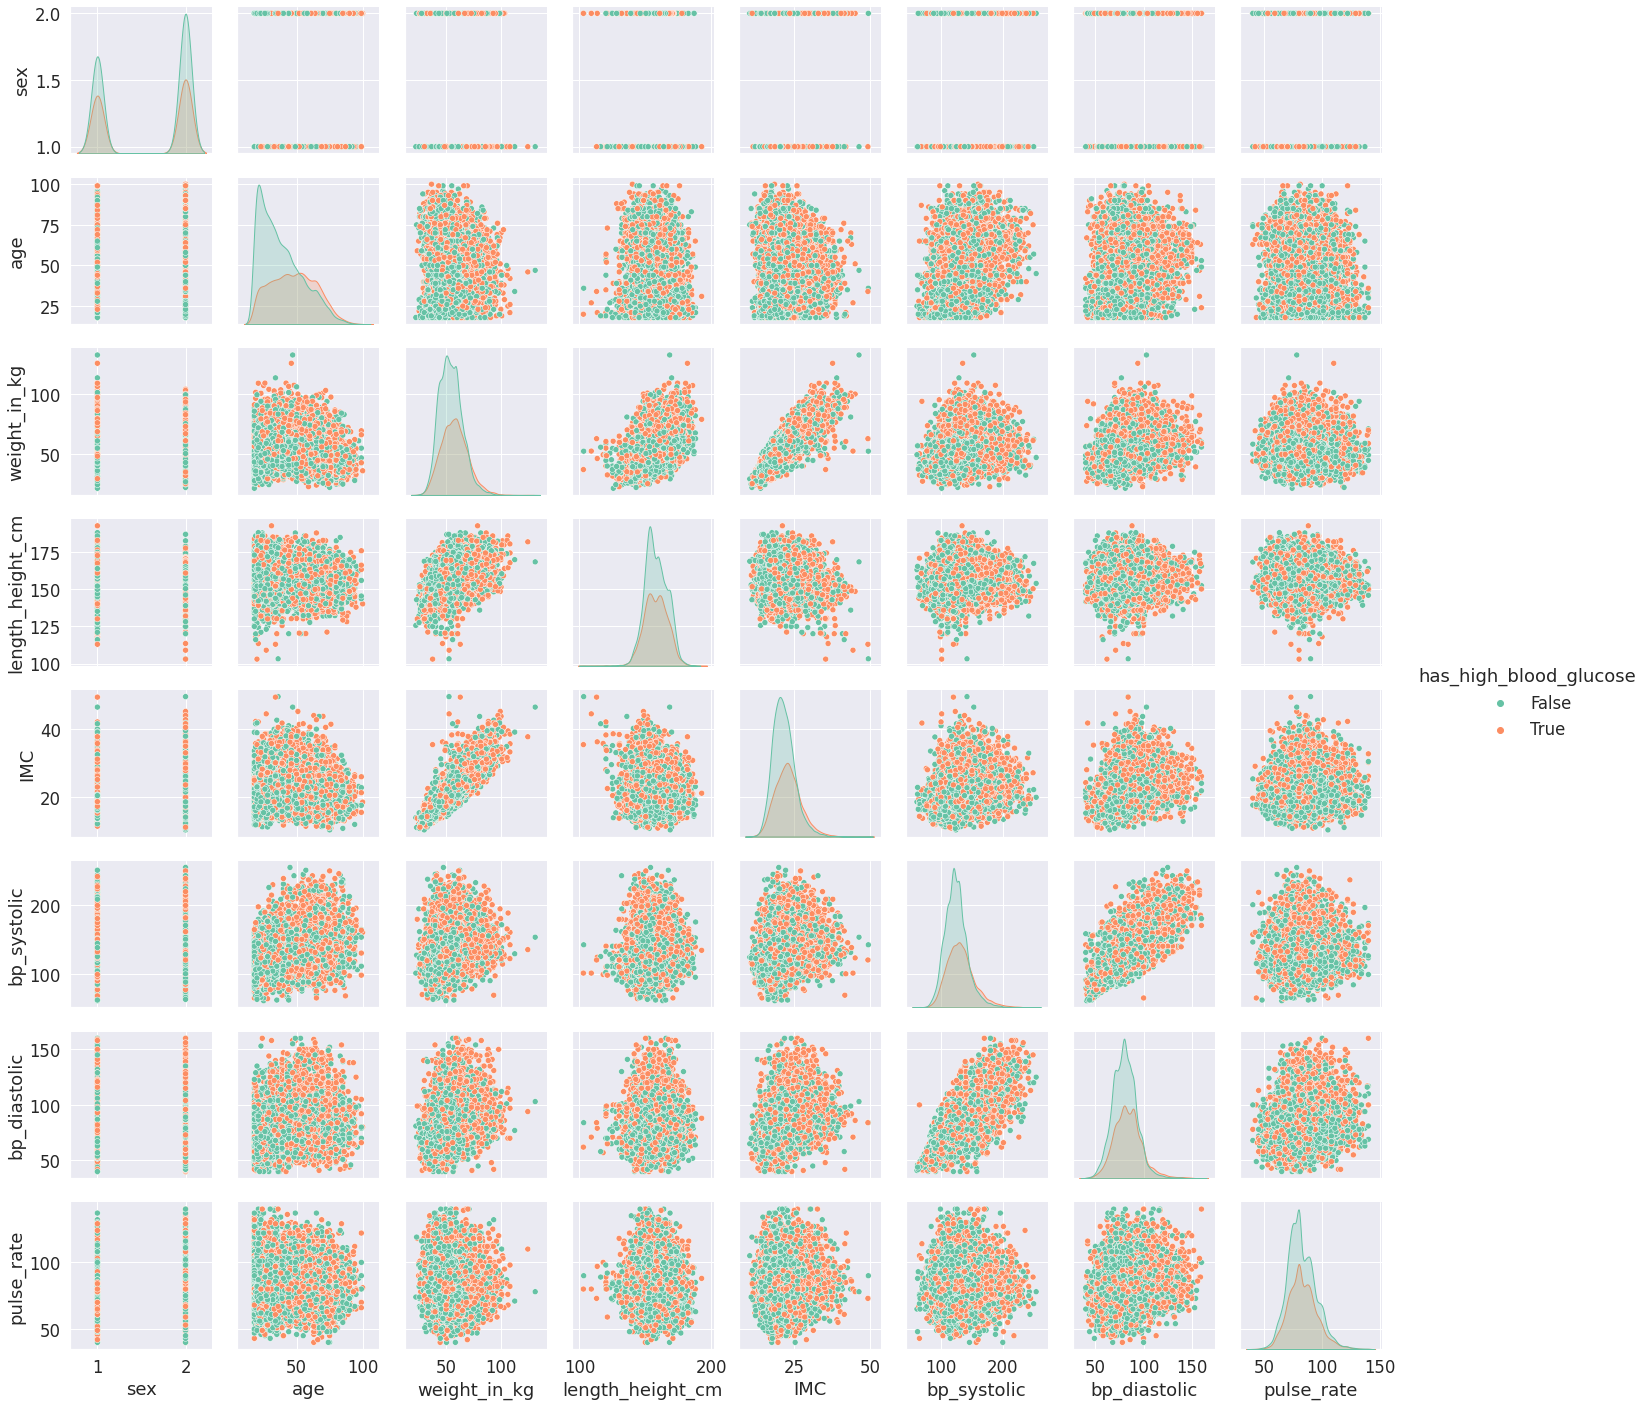

In [ ]:
sns.set(font_scale = 1.5)
sns.pairplot(data = train_set, hue = 'has_high_blood_glucose', diag_kind = 'kde', palette = 'Set2')

##Naive Bayes gaussiano

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test.values.reshape(y_test.values.shape[0],) != y_pred).sum()))

Number of mislabeled points out of a total 7075 points : 2345


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred_train = gnb.fit(X_train, y_train).predict(X_train)
print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0], (y_train.values.reshape(y_train.values.shape[0],) != y_pred_train).sum()))

Number of mislabeled points out of a total 28300 points : 9690


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_test['has_high_blood_glucose'].value_counts(normalize=True)

False    0.622756
True     0.377244
Name: has_high_blood_glucose, dtype: float64

In [ ]:
(7075 - 2345)/7075

0.6685512367491167

##Métricas

A continuación algunas de las métricas más utilizadas para medir desempeño de estos modelos.

Las definiciones fueron extraidas del siguiente paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2636062/



*   **Sensibilidad** (Sensitivity): Es la habilidad del modelo de clasificar correctamente una muestra como positivo. 

  $Sensibilidad = \frac{VP}{(VP+FN)}$
  

*   **Especificidad** (Specificity): Es la habilidad del modelo de clasificar correctamente una muestra como negativo.

  $Especificidad = \frac{VN}{(VN+FP)}$

*   **Valor Predictivo Positivo** (Positive Predictive Value): Es el porcentaje de valores predichos positivos que son realmente positivos.

  $Valor \; Predictivo \; Positivo = \frac{VP}{(VP+FP)}$

*   **Valor Predictivo Negativo** (Specificity): Es el porcentaje de valores predichos negativos que son realmente negativos.

  $Valor \; Predictivo \; Negativo = \frac{VN}{(VN+FP)}$





In [ ]:
nbConfusion = metrics.confusion_matrix(y_test, y_pred)
nbConfusion

array([[3629,  777],
       [1568, 1101]])

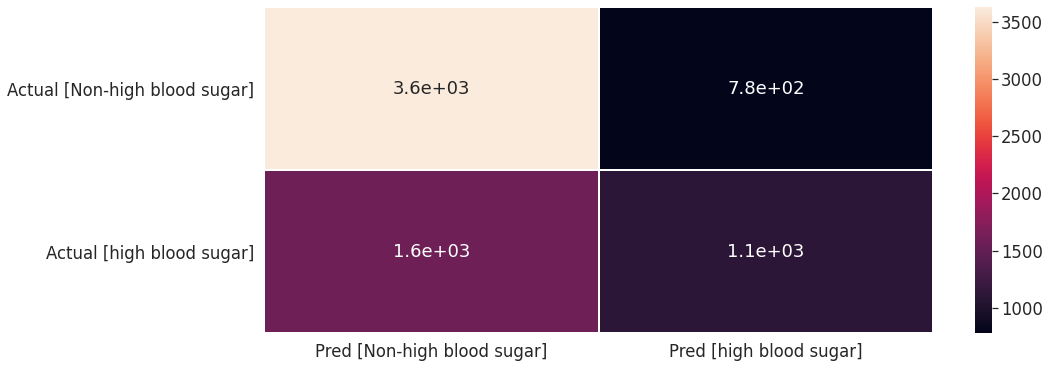

In [ ]:
ylabel = ["Actual [Non-high blood sugar]","Actual [high blood sugar]"]
xlabel = ["Pred [Non-high blood sugar]","Pred [high blood sugar]"]
sns.set(font_scale = 1.5)
plt.figure(figsize=(15,6))
sns.heatmap(nbConfusion, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1)

In [ ]:
VP = nbConfusion[1,1]
VN = nbConfusion[0,0]
FP = nbConfusion[0,1]
FN = nbConfusion[1,0]

print("VP: %d" % VP)
print("VN: %d" % VN)
print("FP: %d" % FP)
print("FN: %d" % FN)

VP: 1101
VN: 3629
FP: 777
FN: 1568


In [ ]:
sensibilidad = VP/(VP+FN)

especificidad = VN/(VN+FP)

vpp = VP/(VP+FP)

vpn = VN/(VN+FN)

print("Sensibilidad: %f" % sensibilidad)
print("Especificidad: %f" % especificidad)
print("Valor Predictivo Positivo: %f" % vpp)
print("Valor Predictivo Negativo: %f" % vpn)


Sensibilidad: 0.412514
Especificidad: 0.823650
Valor Predictivo Positivo: 0.586262
Valor Predictivo Negativo: 0.698287
